Análise de Consumo de Energia Power Edge

1. Importando bibliotecas e carregando os dados



In [5]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt 

DATASET_FILENAME = "./data/dataset.csv"

energy_raw = pd.read_csv(DATASET_FILENAME, parse_dates=["Date and time"])

energy_raw = energy_raw.drop(columns=[col for col in energy_raw.columns if col.startswith('temp')])
energy_raw['Date and time'] = pd.to_datetime(energy_raw['Date and time']).dt.tz_localize(None)
print(energy_raw.dtypes)

print(energy_raw.describe(include='all'))
summary_statistics = energy_raw.describe()

Date and time           datetime64[ns]
potmin_SMV340200               float64
potmin_SMV340201               float64
potmin_SMV340202               float64
potmin_SMV340203               float64
                             ...      
potavg_idrac-9DQGPV3           float64
potavg_idrac-BDQGPV3           float64
potavg_idrac-CDQGPV3           float64
potavg_idrac-DDQGPV3           float64
potavg_idrac-FDQGPV3           float64
Length: 76, dtype: object
             Date and time  potmin_SMV340200  potmin_SMV340201  \
count                  672        666.000000        666.000000   
mean   2025-06-14 04:07:30        701.207207        714.794294   
min    2025-06-10 16:15:00        660.000000        686.000000   
25%    2025-06-12 10:11:15        690.000000        704.000000   
50%    2025-06-14 04:07:30        699.000000        714.000000   
75%    2025-06-15 22:03:45        712.000000        725.000000   
max    2025-06-17 16:00:00        746.000000        763.000000   
std              

                      count     mean     std     min      25%      50%  \
potavg_SMV340200      666.0   729.33   20.12  698.41   713.43   723.88   
potavg_SMV340201      666.0   740.81   18.21  713.27   724.91   737.85   
potavg_SMV340202      666.0   736.28   22.91  698.28   716.56   734.49   
potavg_SMV340203      668.0   765.89   25.50  722.19   745.03   764.18   
potavg_SMV340204      641.0  1013.26  108.92  683.30   937.01  1011.71   
potavg_SMV340205      668.0   952.79   43.79  791.50   931.60   966.67   
potavg_SMV340206      668.0   897.39   39.90  825.94   861.31   895.79   
potavg_SMV340207      630.0   954.32   76.38  657.94   908.32   945.05   
potavg_SMV340208      586.0  1111.49   84.77  662.58  1054.75  1099.20   
potavg_SMV340209      668.0   956.68   67.28  655.86   904.56   949.95   
potavg_SMV340210      666.0  1054.54   56.84  671.77  1024.19  1054.01   
potavg_SMV340211      664.0   968.22  189.21  650.92   689.34  1047.48   
potavg_SMV340212      592.0   848.51  

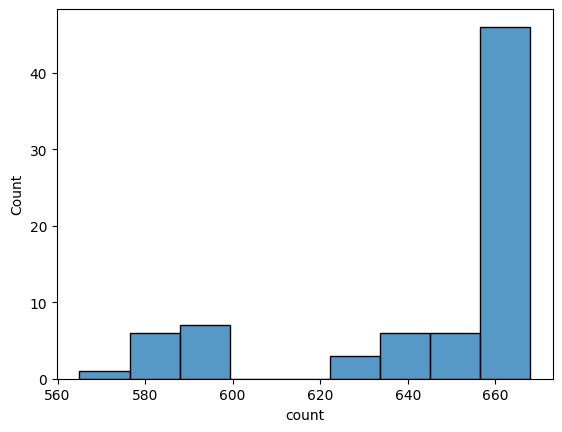

In [6]:
# Plotando o histograma de quantidade de medidas realizadas
sns.histplot(summary_statistics.iloc[0,1:])
potavg_cols = [col for col in energy_raw.columns if col.startswith('potavg')]
print(energy_raw[potavg_cols].describe().T.round(2))




## Visualizando o consumo por dia no período  



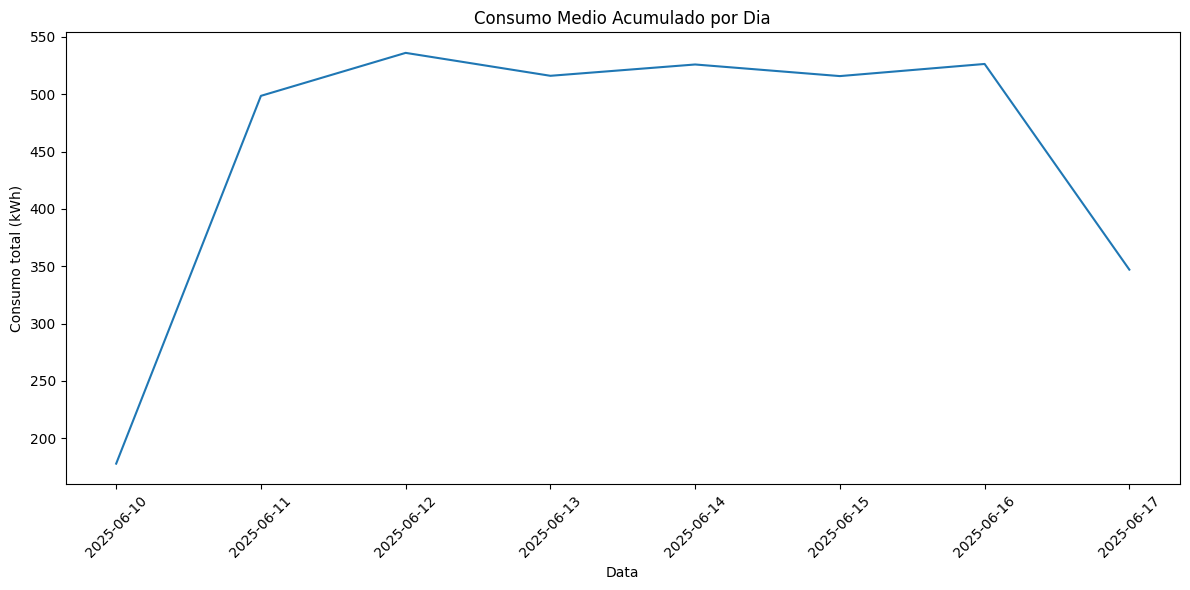

In [9]:
energy_raw['data'] = energy_raw['Date and time'].dt.date 
energy_raw['consumo_total'] = energy_raw[potavg_cols].sum(axis=1) * 0.25 / 1000

consumo_dia = energy_raw.groupby('data')['consumo_total'].sum()

# Plotagem dos dados  

plt.figure(figsize=(12, 6))
sns.lineplot(data=consumo_dia)
plt.title("Consumo Medio Acumulado por Dia")
plt.ylabel("Consumo total (kWh)")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






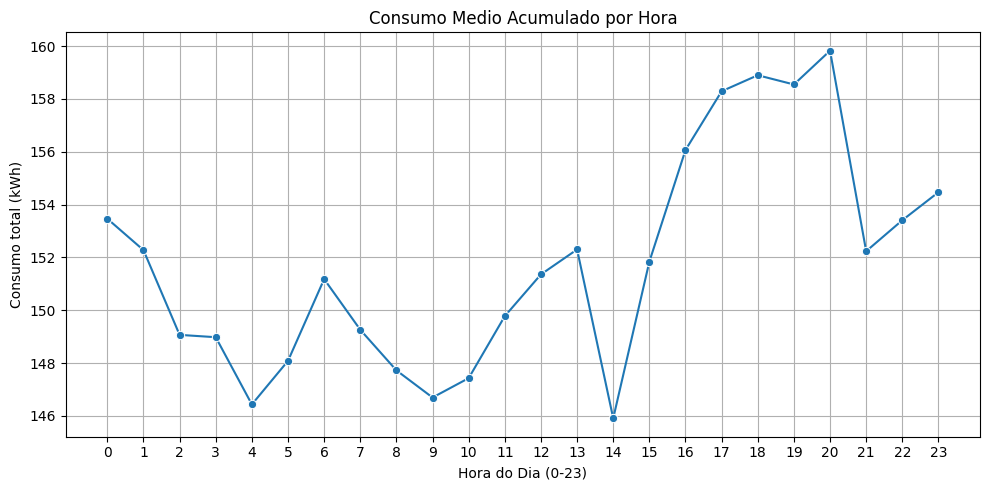

In [13]:
energy_raw['hora_do_dia'] = energy_raw['Date and time'].dt.hour
consumo_por_hora = energy_raw.groupby('hora_do_dia')['consumo_total'].sum()

# Plotagem dos dados
plt.figure(figsize=(10, 5))
sns.lineplot(x=consumo_por_hora.index, y=consumo_por_hora.values, marker='o')

plt.title("Consumo Medio Acumulado por Hora")
plt.ylabel("Consumo total (kWh)")
plt.xlabel("Hora do Dia (0-23)")
plt.xticks(range(0,24))
plt.grid(True)
plt.tight_layout()
plt.show()



## Avaliar a média e a dispersão dos dados de consumo de energia

/var/folders/vk/mcbq8f1n5xsc7vnkx9wg5bh80000gn/T/ipykernel_41320/2939281603.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top10.index, x=top10.values, ax=ax[0], palette='viridis')
/var/folders/vk/mcbq8f1n5xsc7vnkx9wg5bh80000gn/T/ipykernel_41320/2939281603.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=botton10.index, x=botton10.values, ax=ax[1], palette='Greens')


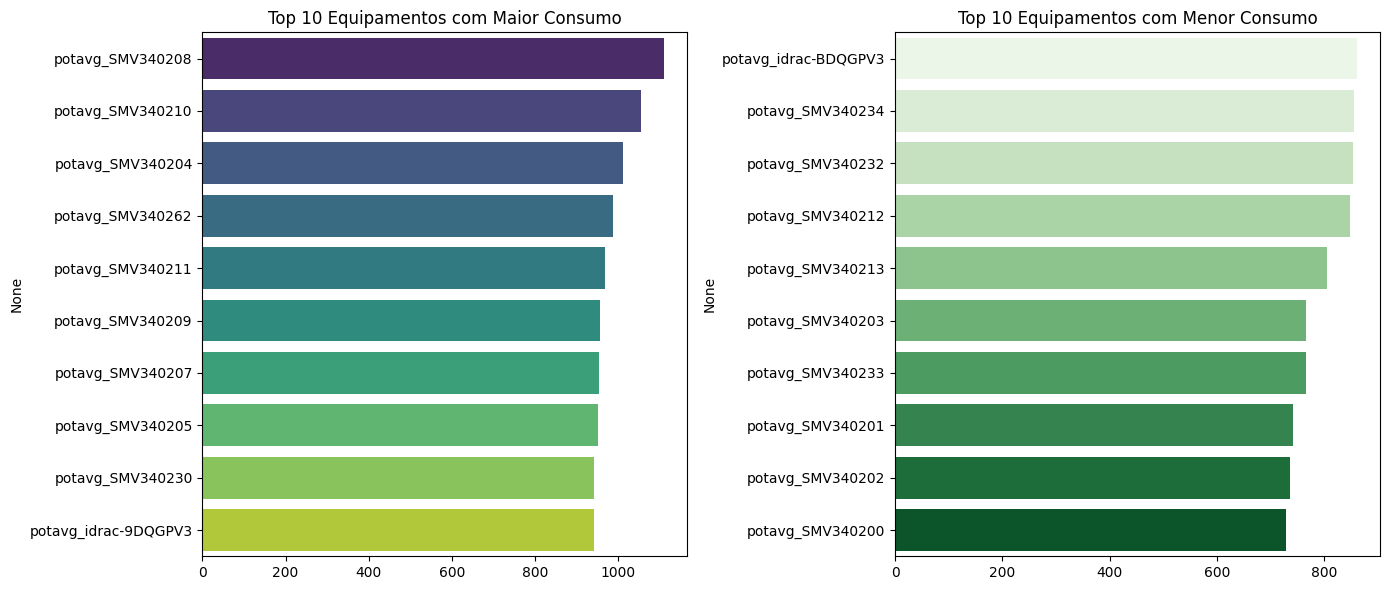

In [14]:
media_consumo = energy_raw[potavg_cols].mean().sort_values(ascending=False) 
top10 = media_consumo.head(10) 
botton10 = media_consumo.tail(10) 

fig, ax = plt.subplots(1,2,figsize=(14,6)) 

sns.barplot(y=top10.index, x=top10.values, ax=ax[0], palette='viridis')
ax[0].set_title("Top 10 Equipamentos com Maior Consumo")

sns.barplot(y=botton10.index, x=botton10.values, ax=ax[1], palette='Greens')
ax[1].set_title("Top 10 Equipamentos com Menor Consumo") 

plt.tight_layout()
plt.show() 


In [ ]:
## Analise Gemini 

import sklearn.preprocessing as StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklear.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm  

# Estilo dos gráficos 
sns.set_style(style="whitegrid")
%matplotlib inline 

energy_long = pd.melt(energy_raw, id_vars=['Date and time'], var_name=)